In [16]:
%autosave 3


Autosaving every 3 seconds


<a id='0'></a>
### 　　目　录
* [课程1.神经网络](#1)



* [课程2： 深度神经网络](#2)　　
　
 
 
* [课程 3：卷积神经网络](#3)　　


 
* [课程 4：癌症检测深度学习（Sebastian Thrun）](#4)




[TOC]

∂ σ α
training  a neural network,   just means finding the weights we use to calculate the prediction.

<a id='1'></a>
# [1.神经网络](#0)

### 1.5 线性分界


### 1.7 

 <img src="./img/感知器.png" width="60%">
 
* x 输入
* W 权重
* b 偏差
* label 计算出值后，根据情况赋值 0或者1
* 预测(输出/预测公司) y_hat= Wx+b >= 0 y_hat = 1  如果Wx+b<0 y_hat = 0

### 1.10 感知器技巧

负点进了正区域 （W， b）-α(X，1）
正点进了负区域 （W， b）+α(X，1）


In [10]:
# 感知器算法
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

### 1.14

>误差函数必须是连续的，不能是离散的。
 
### 1.15
将激活函数（activation function）离散的阶跃函数（step function） 到 连续的s函数（sigmoid function）
### 1.16. Softmax 函数
> 概率总和必须是1     

激活函数：$$\sigma(x) = \frac{1}{1+e^{-x}}$$


 

np.exp()指数e

In [11]:
# 编写 Softmax
import numpy as np

def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result
    
    # Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL = np.exp(L)
    #     return np.divide (expL, expL.sum())


### 1.17. One-Hot 编码 
yes no no 1 0 0 
no yes no 0 10 
### 1.18. 最大似然率
用a是a的概率，相乘。一直到最大化，最大似然法
### 1.19. 最大化概率
乘法，改了一个乘数，改变过大。用log转化为加法
### 1.20. 交叉熵 corss entropies
p1*p2*p3 转化为-ln(p1)-ln(p2)-ln(p3)交叉熵值越大，模型越差  
由于y取值为1和0 ，随意直接带入计算  

 

In [12]:
# 交叉熵公式。
#   Y = 1 代表positive Y=0 表示neggtive
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(  Y * np.log(P) + (1 - Y) * np.log(1 - P)  )


### 1.22.  多类别交叉熵  
Pij i事件在j情况下的概率 Yijln（pij）求和
### 1.23. Logistic 回归
机器学习中最热门和最有用的算法之一，它也是所有机器学习的基石——对数几率回归算法
* 获得数据
* 选择一个随机模型
* 计算误差
* 最小化误差，获得更好的模型 


<img src="./img/误差函数.png" width="70%">
<img src="./img/Error_Function.png" width="40%" >

### 1.24 梯度下降 gradient
预测 y = σ(WX + b)
梯度 <img src="./img/梯度公式.png" width="40%" >
* （∂E/∂wi）=（y-y^)xi  ∂E/∂b=（y-y^)  算出新的权重wi'和新的偏差b'  
**w的偏导数就是$（y-\hat{y})x_i$，b的偏导数就是$（y-\hat{y})$**
* 误差函数
 $$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$
> 梯度实际上是标量乘以点的坐标！ 这意味着，如果标签与预测接近（表示点分类正确），该梯度将很小，如果标签与预测差别很大（表示点分类错误），那么此梯度将很大。请记下：小的梯度表示我们将稍微修改下坐标，大的梯度表示我们将大幅度修改坐标。

### 1.25 梯度下降算法 
1.随机的权重，w1,,,,wn,b 得出直线Wx+b=0，概率函数σ（Wx+b）
2.对已，学习速率α（x1，，，，xn)    
* wi-α（∂E/∂wi）得出wi'     
$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

* b-α（∂E/∂b）得出b'    
$$ b \longrightarrow b + \alpha (y - \hat{y})$$

3.重复，重复次数叫做epoch，一个epoch是指把所有训练数据完整的过一遍
<img src="./img/梯度下降算法步骤.png" width="40%" >

 
 

####  Sigmoid 激活函数   输出（预测）公式  误差函数  更新权重的函数

In [13]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1/(1+np.exp(x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return  sigmoid(np.matmul(features, weights)+bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y*(np.log(output))-(1-y)*(np.log(1-output))

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)T
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

SyntaxError: invalid syntax (<ipython-input-13-546b3170e344>, line 17)

### 1.26. 感知器和梯度下降


##### 梯度下降（连续）

区别：
* 所有点改变权重
* $ \hat{y}$ 是0-1连续取值

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

#### 感知器（离散）
区别：
* 只有错误点才会改变权重
* $ \hat{y}$ 只能取值0，1
$$ w_i \longrightarrow w_i + \alpha x_i \qquad    错误点为 positive \quad y=1\ \hat{y}=0\quad  y - \hat{y}=1$$
$$ w_i \longrightarrow w_i - \alpha x_i \qquad    错误点为 negative \quad  y=0\ \hat{y}=1\quad y - \hat{y}=-1$$ 
* 分类争取$y - \hat{y}=0 $


<a id='2'></a>
# [课程2：深度神经网络](#0)
### 2.3. 神经网络结构
* 输入层input layer &nbsp 　　　　 多节点导致多维空间
* 隐藏层hidden layer　　　　　　　多节点，形成深度神经网络
* 输出层output layer　　　　　　　输出多节点，多输出
### 2.5. 前向反馈 FeedForward
预测函数：$\hat{y}=\sigma(Wx+b)$  
$\hat{y}=\sigma(w3 \sigma (w2\sigma(w1*x)))$

### 2.6. 反向传播 Backpropagation
* 进行前向反馈运算。
* 将模型的输出与期望的输出进行比较。
* 计算误差。
* 向后运行前向反馈运算（反向传播），将误差分散到每个权重上。
* 更新权重，并获得更好的模型。
* 继续此流程，直到获得很好的模型。
 
### 2.7. [Keras](https://keras.io/)
**序列模型**

In [15]:
 from keras.models import Sequential

 #Create the Sequential model
model = Sequential()

ModuleNotFoundError: No module named 'keras'

keras.models.Sequential 类是神经网络模型的封装容器。它会提供常见的函数，例如 fit()、evaluate() 和 compile()。我们将介绍这些函数（在碰到这些函数的时候）。我们开始研究模型的层吧。
**层**
Keras 层就像神经网络层。有全连接层、最大池化层和激活层。你可以使用模型的 add() 函数添加层。例如，简单的模型可以如下所示：
* 激活函数有：relu softmax sigmoid

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

#创建序列模型
model = Sequential()

# 第一层 - 添加有128个节点的全连接层以及32个节点的输入层
# 将维度设为 32（表示数据来自 32 维空间）
model.add(Dense(128, input_dim=32))

#第二层 - 添加 softmax 激活层
model.add(Activation('softmax'))

#第三层 - 添加全连接层
model.add(Dense(10))

#第四层 - 添加 Sigmoid 激活层
model.add(Activation('sigmoid'))
# 我们将损失函数 loss 指定为我们一直处理的 categorical_crossentropy。
# 我们还可以指定优化程序 optimizer，  adam。
# 我们可以指定评估模型用到的指标。我们将使用准确率。
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
# 我们可以使用以下命令来查看模型架构：
model.summary()
# 然后使用以下命令对其进行拟合，指定 epoch 次数和我们希望在屏幕上显示的信息详细程度。
# 每 epoch 完成对整数据集的一次遍历
# verbose 参数可以指定显示训练过程信息类型，这里定义为 0 表示不显示信息
# 注意：在 Keras 1 中，nb_epoch 会设置 epoch 次数，但是在 Keras 2 中，变成了 epochs。
model.fit(X, y, nb_epoch=1000, verbose=0)
# 最后，我们可以使用以下命令来评估模型：
model.evaluate()


ModuleNotFoundError: No module named 'keras'

In [ ]:
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
tf.python.control_flow_ops = tf

# Set random seed
np.random.seed(42)

# Our data
X = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

# One-hot encoding the output
y = np_utils.to_categorical(y)

# Building the model
xor = Sequential()
xor.add(Dense(32, input_dim=2))
xor.add(Activation("sigmoid"))
xor.add(Dense(2))
xor.add(Activation("sigmoid"))

xor.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

# Uncomment this line to print the model architecture
# xor.summary()

# Fitting the model
history = xor.fit(X, y, nb_epoch=1000, verbose=0)

# Scoring the model
score = xor.evaluate(X, y)
print("\nAccuracy: ", score[-1])

# Checking the predictions
print("\nPredictions:")
print(xor.predict_proba(X))

### 2.11. 早期停止
> 降低梯度，直到测试误差停止降低并开始增大

### 2.12. 正则化

<img src='./img/正则化.png' width = '70%'>
### 2.14. Dropout

> 每次drop一定量的节点

### 2.15. Dropout
### 2.16. 梯度消失
Relu激活函数
### 2.17. 其他激活函数
* 双曲正切 Hyperbolic Tangent [-1,1 ]  　　 $tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$
* 修正线性单元ReLU，最后依旧是s函数 　　 $ relu(x) = \begin{cases} x, & \text {if $x\geq0$ } \\ 0, & \text{if $x<0$  } \end{cases} $
### 2.18. 批次与随机梯度下降 
> 误差函数的梯度负值方向，epochs次数=步长次数（number of steps），每次都是所以数据

而批次，指把数据分为几个批次，每一个批次是一个epochs
### 2.19. 学习速率衰退
* 过大的学习速率，大步长 ，可能错过最低点，可能错过最佳点 **当模型不可行，适当降低学习速率**
* 过小的学习速率，小过长，模型速度过慢
### 2.20. 随机重新开始
> 从不同地方开始，得到最低点可能性增加

### 2.21. 动量Momentun

$\beta$ [0.1 ]
step(n) + $\beta$step(n-1))+$\beta^2$step(n-2)+...
### 2.22 Keras 中的优化程序
##### SGD
这是随机梯度下降。它使用了以下参数：

* 学习速率。
* 动量（获取前几步的加权平均值，以便获得动量而不至于陷在局部最低点）。
* Nesterov 动量（当最接近解决方案时，它会减缓梯度）。
##### Adam
Adam (Adaptive Moment Estimation) 使用更复杂的指数衰减，不仅仅会考虑平均值（第一个动量），并且会考虑前几步的方差（第二个动量）。
##### RMSProp
RMSProp (RMS 表示均方根误差）通过除以按指数衰减的平方梯度均值来减小学习速率。

<a id='3'></a>

# [课程 3：卷积神经网络](#0)
`

### 3.3. 计算机是如何解析图片的


In [4]:
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data

# use Keras to import pre-shuffled MNIST database   
mnist = input_data.read_data_sets("mnist/", one_hot=False)  
X_train ,y_train= mnist.train.images,mnist.train.labels 
print(X_train.shape)
X_train.shape = [55000,28,28]
print(X_train.shape)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 28, 28)


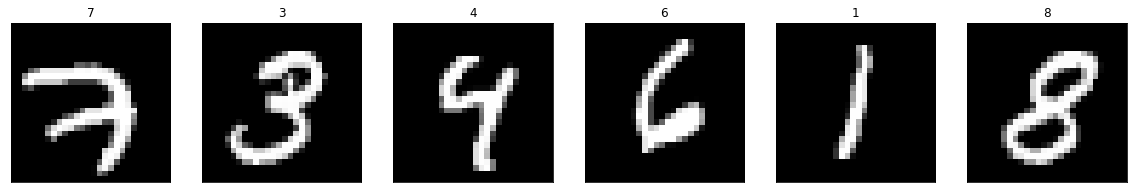

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
   
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3.4 图片分类MLP

### 3.7 MLP 何时效果不错？
CNN 在处理多维数据是比MLP效果好，MLP会吧多维转化为向量，不利于处理多数据
<img src='./img/CNN与MLP比较.png'  width='77%'>

### 3.8. 局部连接性
完全连接层（fully connected layer） to 局部连接层（locally connected layer） 
### 3.9. 卷积层 
> convolutional layer is a stack of feature(特征映射堆栈)
 one feature map for each filter
 
 
* 后一层使用更深层次的卷积层，可以利用前一层卷积层中发现规律，来找出更深层的规律

Filter 检测特征，可视化Filter
ReLU
不设定权重wights让网络判断哪些权重可以和最小化损失函数loss function

集合collections either feature maps（特征映射） or activation maps(激活映射)
* 滤波器，过滤器
   * 灰度图片，二维
   * 彩色图片，三维，filter has three dimensional, 滤波器的重叠，

### 3.11. Stride 和填充
* set padding to 'vaild'   lose some nodes in the convolutional layer
* set padding to 'same'
### 3.12. Keras 中的卷积层
1.导入模块  
`from keras.layers import Conv2D `
2.创建卷积层  
`Conv2D(filtrers, kernel.size, strides, padding, activation='relu',input_shape)`
3.参数

* 必须传递以下参数：
   * filters - 过滤器数量。
   * kernel_size - 指定（方形）卷积窗口的高和宽的数字。
* 你可能还需要调整其他可选参数：
   * strides - 卷积 stride。如果不指定任何值，则 strides 设为 1。
   * padding - 选项包括 'valid' 和 'same'。如果不指定任何值，则 padding 设为 'valid'。
   * activation - 通常为 'relu'。如果未指定任何值，则不应用任何激活函数。强烈建议你向网络中的每个卷积层添加一个 ReLU 激活函数
* 注意：
   * 可以将 kernel_size 和 strides 表示为数字或元组。

   * 在模型中将卷积层当做第一层级（出现在输入层之后）时，必须提供另一个 input_shape 参数： input_shape - 指定输入的高度、宽度和深度（按此顺序）的元组。注意：如果卷积层不是网络的第一个层级，请勿包含 input_shape 参数。
   
### 3.13. 维度

* Param #  卷积层具有 80 个参数。
* Output Shape   None 对应的是批次大小，卷积层的高度为 100，宽度为 100，深度为 16。
* 公式：卷积层中的参数数量
> 卷积层中的参数数量取决于 filters、kernel_size 和 input_shape 的值。我们定义几个变量：

   * K - 卷积层中的过滤器数量   K = filters，
   * F - 卷积过滤器的高度和宽度   F = kernel_size
   * D_in - 上一层级的深度    D_in 是 input_shape 元祖中的最后一个值。
 

因为每个过滤器有 F\*F\*D_in 个权重，卷积层由 K 个过滤器组成，因此卷积层中的权重总数是 K\*F\*F\*D_in。因为每个过滤器有 1 个偏差项，卷积层有 K 个偏差。

因此，卷积层中的**参数数量**是 K\*F\*F\*D_in + K。

* 公式：卷积层的形状
> 卷积层的形状取决于 kernel_size、input_shape、padding 和 stride 的值。我们定义几个变量：

   * K - 卷积层中的过滤器数量   K = filters、
   * F - 卷积过滤器的高度和宽度   F = kernel_size
   * H_in - 上一层级的高度
   * W_in - 上一层级的宽度
   * S = stride。
 类似地，H_in 和 W_in 分别是 input_shape 元祖的第一个和第二个值。

卷积层的**深度**始终为过滤器数量 K。

* 如果 padding = 'same'，那么卷积层的空间维度如下：
  * (height = ceil(float(H_in) / float(S))
  * width = ceil(float(W_in) / float(S))
  
* 如果 padding = 'valid'，那么卷积层的空间维度如下:

   * height = ceil(float(H_in - F + 1) / float(S))
   * width = ceil(float(W_in - F + 1) / float(S))

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=2, strides=8, padding='valid', 
    activation='relu', input_shape=(200, 200, 1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 8)         40        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


### 3.13. 池化层 pooling layer
> often take convolutional layers(卷积层) as input
复杂数据及——大量过滤器（负责找一种规律）——高维度——多参数——过拟合


* pool_size - 指定池化窗口高度和宽度的数字。（必须指定）

* strides - 垂直和水平 stride。  默认为 pool_size。
* padding - 选项包括 'valid' 和 'same'。 默认 padding 设为 'valid'。
      注意：可以将 pool_size 和 strides 表示为数字或元组。

In [ ]:
# 导入
from keras.layers import MaxPooling2D
# 创建卷积层
MaxPooling2D(pool_size,strides, padding) 


In [5]:
from keras.models import Sequential
from keras.layers import MaxPooling2D

model = Sequential()
model.add(MaxPooling2D(pool_size=2, strides=2, input_shape=(100, 100, 15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 15)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


### 3.16. 图片分类CNN
* 注意事项：
   * 始终向 CNN 中的 Conv2D 层添加 ReLU 激活函数。但是网络的最后层级除外，密集层也应该具有 ReLU 激活函数。
   * 在构建分类网络时，网络中的最后层级应该是具有 softmax 激活函数的 密集层。最后层级的节点数量应该等于数据集中的类别总数。
  

In [1]:
# 和神经网络一样，我们通过首先创建一个序列模型来创建一个 CNN。
from keras.models import Sequential

# 导入几个层，包括熟悉的神经网络层，以及在这节课学习的新的层。
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 和神经网络一样，通过使用 .add() 方法向网络中添加层级：
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\lee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

### 3.21 可视化CNN



### 3.23. 迁移学习
> 对训练过的神经网络调整，用于新的不同的数据集
1.setting numerous hyper parameters
2.choose last function and optimizer


* 删掉后几层，保留前几层。
* 对小型数据集使用迁移学习需要考虑过拟合现象。

* 下面是卷积神经网络的作用一般概述：
  * 第一层级将检测图片中的边缘
  * 第二层级将检测形状
  * 第三个卷积层将检测更高级的特征


<a id='4'></a>

# [ 课程 4：癌症检测深度学习（Sebastian Thrun）](#0)

* 清洗数据很重要
* 对网络训练完全不同的事物(如检测皮肤癌，训练猫狗汽车图片），最终可能得到更好的结果

*
   * Recall 查全率 Recall = True Positives / ( True Positives + False Negatives)
   * Precison 查准率 Precision = True Positives / (True Positives + False Positives)
   * Sentitivity  敏感性   就是Recall  sensitive to cancer means it finds cancer
   * Specificity 特异性    不是查准率 
   
 
* 定义
   * 敏感性：在患有癌症的所有人中，诊断正确的人有多少？
  * 特异性：在未患癌症的所有人中，诊断正确的人有多少？
  * 查全率：在被诊断患有癌症的所有人中，多少人确实得了癌症？
  * 查准率：在患有癌症的所有人中，多少人被诊断患有癌症？
* 标记 注：T代表诊断正确，F错误。P说有病，N说没病  
  * TP：（真阳性）被正确诊断为患病的病人。
  * TN：（真阴性）被正确诊断为健康的健康人。
  * FP：（假阳性）被错误诊断为患病的健康人。
  * FN：（假阴性）被错误诊断为健康的病人。
* ROC
  * 敏感性：在所有恶性病变中，位于阈值右侧的病变（正确分类）的百分比是多少？
  * 特异性：在所有良性病变中，位于阈值左侧的病变（正确分类）的百分比是多少？

https://github.com/an46/Dog-Breed-Recognition-Project/blob/master/dog_app.ipynb
https://github.com/vaklyuenkov/aind-cnn-dog_project/blob/master/dog_app.ipynb
https://github.com/loeiten/dog-project/blob/master/dog_app.ipynb
https://blog.csdn.net/weixin_41770169/article/details/80498138